# Bias variance tradeoff

## Lecture 5

### GRA 4160
### Predictive modelling with machine learning

#### Lecturer: Vegard H. Larsen

The bias-variance tradeoff is a fundamental concept that refers to the tradeoff between two sources of model error, that is: **bias** and **variance**.

Bias refers to the error that is introduced by approximating a real-world problem with a simpler model.
Models with high bias tend to make strong assumptions about the underlying data and therefore have limited capacity to capture complex patterns in the data.
As a result, models with high bias tend to underfit the data, meaning that they perform poorly on both the training data and new, unseen data.

Variance refers to the error that is introduced by the model's sensitivity to small fluctuations in the training data.
Models with high variance tend to be very flexible and capture many details of the training data, but they may overfit the data, meaning that they perform well on the training data but poorly on new, unseen data.

The goal of machine learning is to find a balance between bias and variance to produce a model that generalizes well to new data.

If the model has high bias, increasing its complexity will reduce the bias but increase the variance.

If the model has high variance, reducing its complexity will reduce the variance but increase the bias.

The challenge is to find the right balance that minimizes the overall error.

## Overfitting vs underfitting:
Here we generate some noisy non-linear data and fit it with polynomial regression models of increasing degree.

- As the degree of the polynomial increases, the model becomes more flexible and captures more of the noise in the data, leading to overfitting.
- As the degree decreases, the model becomes less flexible and has a high bias, leading to underfitting.

The code bellow generates some noisy sinusoidal data and fits polynomial regression models of different degrees to the data.

The models are fit using 10-fold cross-validation to estimate the mean squared error, and the results are plotted.

You can see how as the degree of the polynomial increases, the model becomes more flexible and captures more of the noise in the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Generate some noisy data
np.random.seed(10)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + 0.2 * np.random.randn(80)

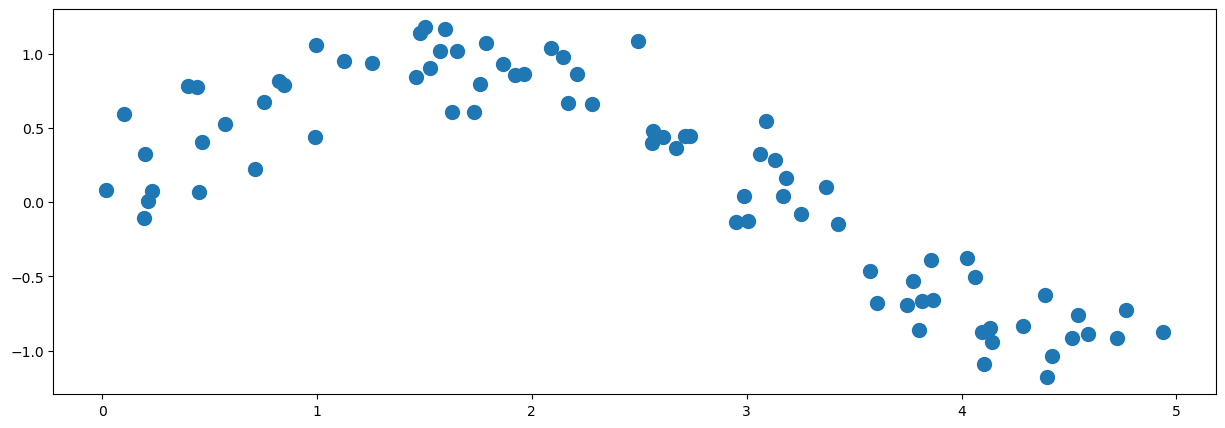

In [2]:
plt.figure(figsize=(15, 5))
plt.plot(X, y, 'o', label='data', markersize=10)

In [3]:
def polynomial_regression(degree, cv=10):
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                 ('linear', LinearRegression(fit_intercept=False))])
    scores = cross_val_score(model, X, y, cv=cv)
    y_pred = model.fit(X, y).predict(X)
    plt.figure(figsize=(12, 5))
    plt.plot(X, y, 'o', label='data', markersize=10)
    plt.plot(X, y_pred, linestyle='--', label=f'degree={degree} (error={np.mean(np.abs(scores)):.3f})')
    plt.legend()
    plt.tight_layout()

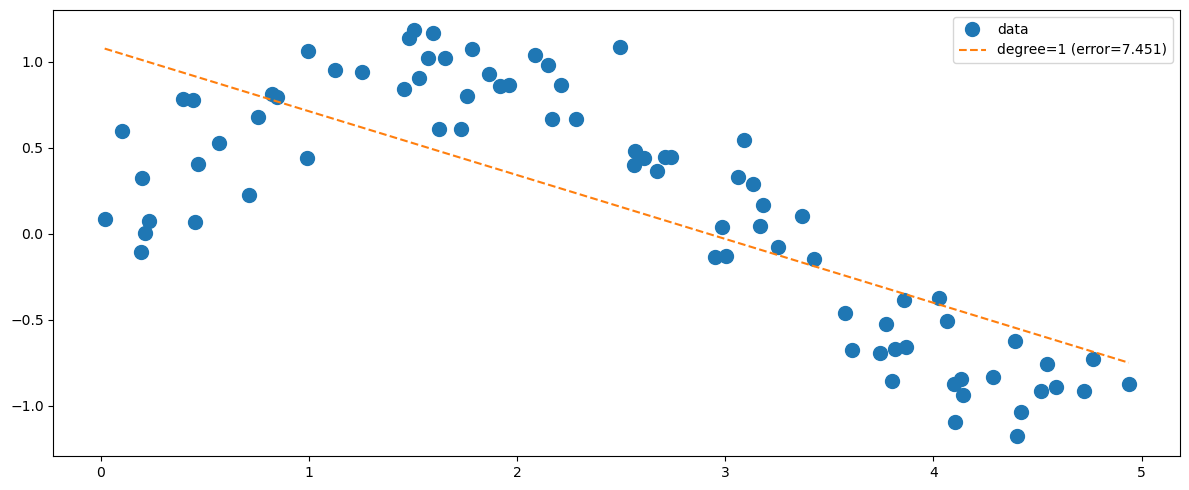

In [4]:
# Fit polynomial regression models of degree 1

polynomial_regression(1)
plt.savefig('../tex/figures/bias_variance_tradeoff_1.png')

You can see from the plot that the model predictions are not a good fit to the observed data.
The model is too simple, or has too few parameters, to capture the underlying pattern in the data.

This is an example of high bias.

Let´s increase the model complexity by adding more parameters to the model:

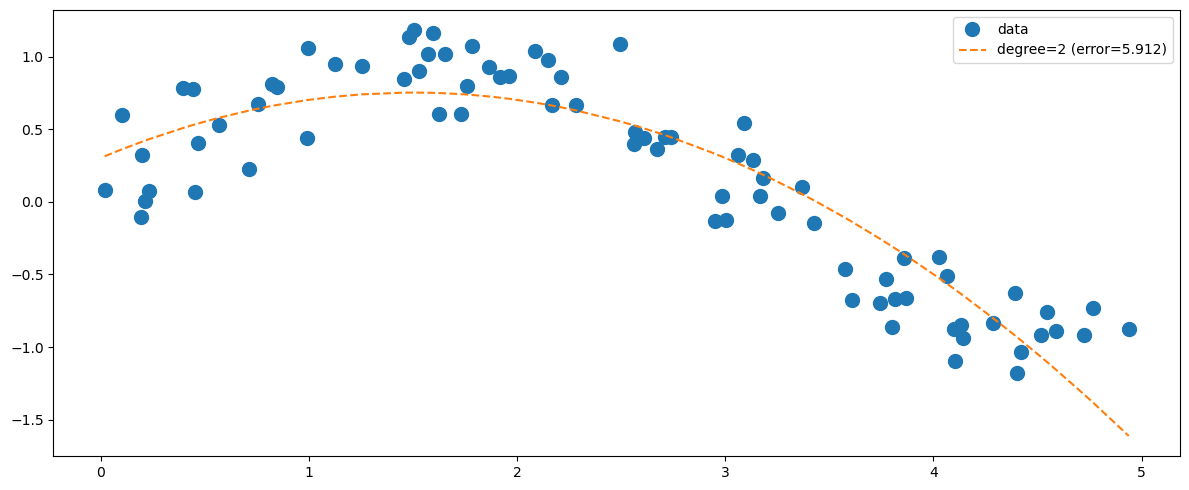

In [5]:
# Fit polynomial regression models of degree 2

polynomial_regression(2)

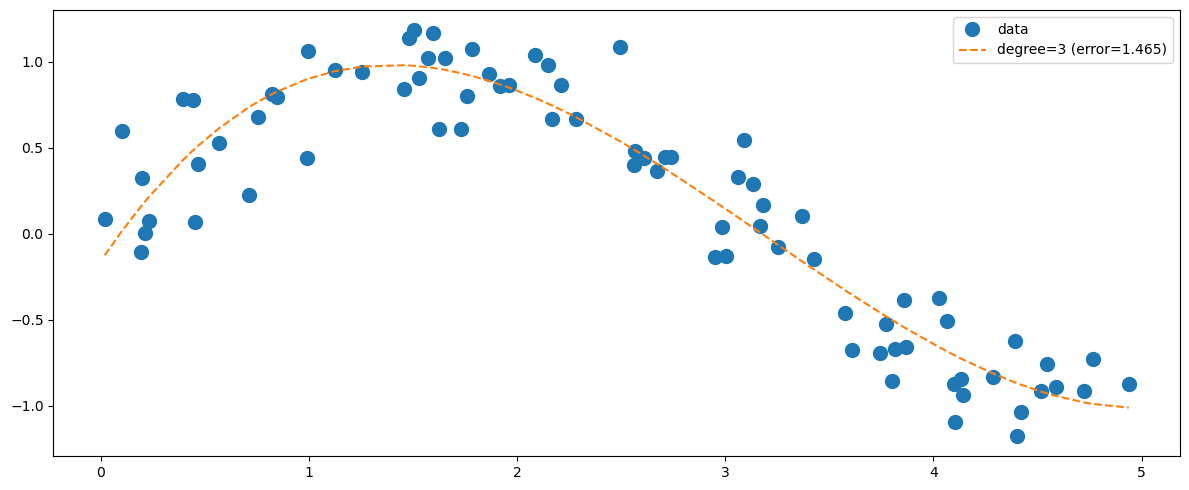

In [6]:
# Fit polynomial regression models of degree 3

polynomial_regression(3)

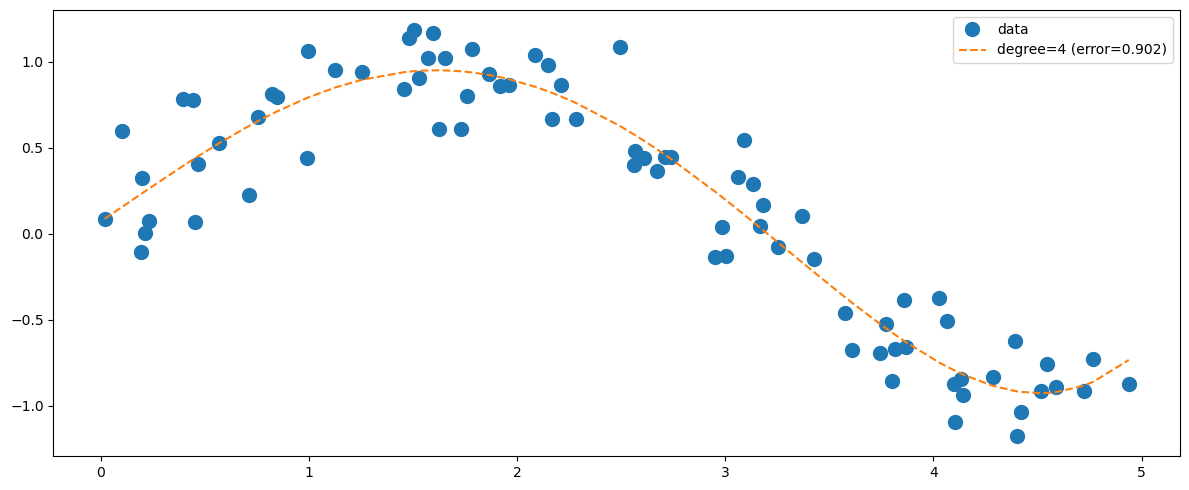

In [7]:
# Fit polynomial regression models of degree 4

polynomial_regression(4)

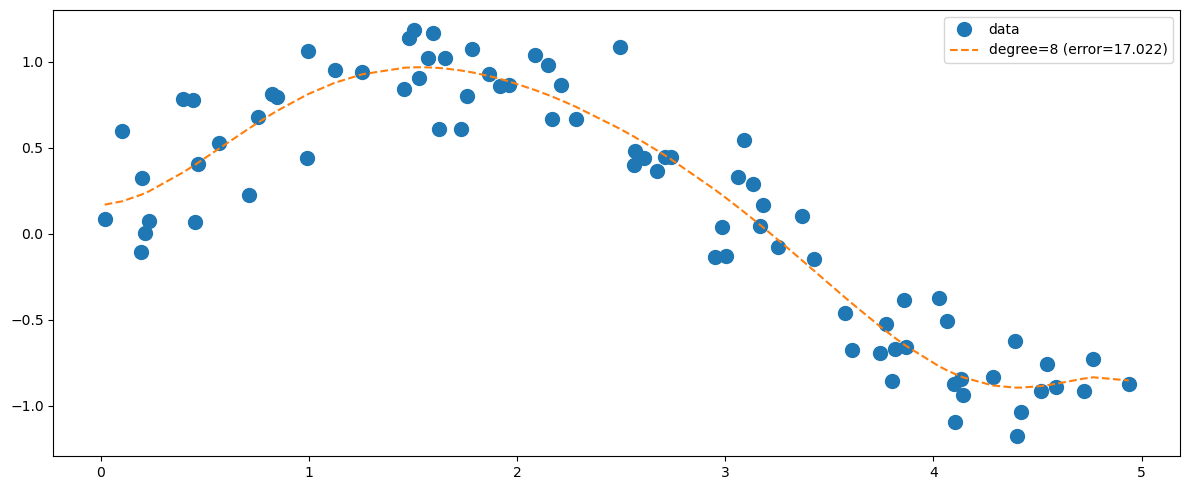

In [8]:
# Fit polynomial regression models of degree 8

polynomial_regression(8)

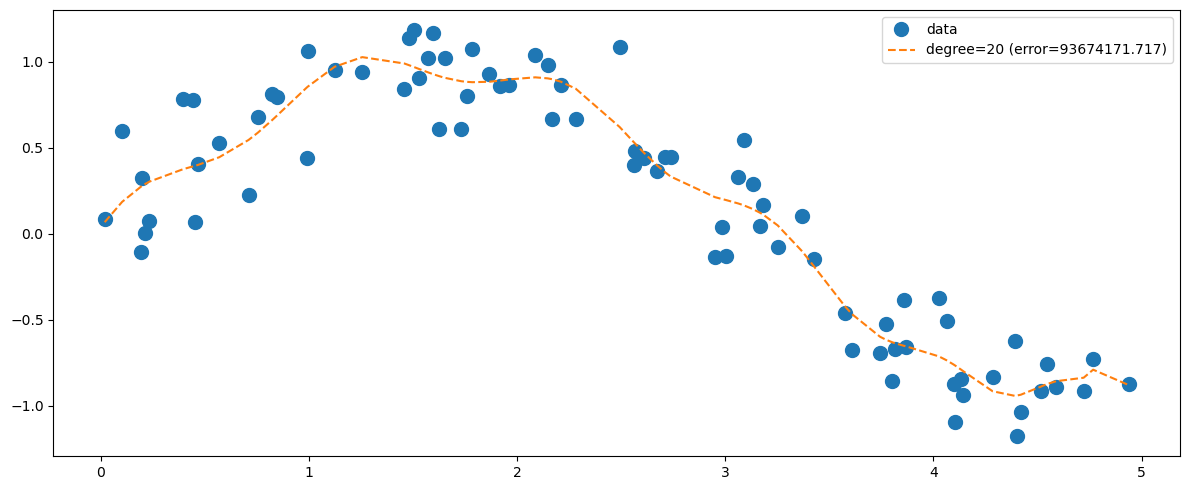

In [9]:
# Fit polynomial regression models of degree 20

polynomial_regression(20)
plt.savefig('../tex/figures/bias_variance_tradeoff_2.png')

You can see from the plot that the model predictions are overfitting the observed data, and are capturing the noise in the data as well as the underlying pattern.
The model is too complex, has too many parameters, and is not generalizing well to unseen data.
This is an example of high variance.